In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

In [76]:
matlabMatrix = sio.loadmat("./machine-learning-ex3/ex3/ex3data1.mat")

X = np.array(matlabMatrix['X'], dtype=np.float32)
Y = np.array(matlabMatrix['y'], dtype=np.int)
Y = Y-1
print(X.shape, Y.shape)

[[9]
 [9]
 [9]
 ...
 [8]
 [8]
 [8]]
(5000, 400) (5000, 1)


3


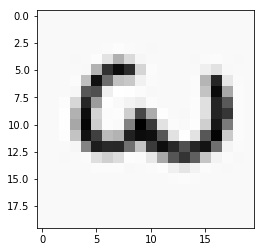

In [83]:
def displayData(x, y):
    r = random.randint(0, len(x) - 1)
    plt.imshow(x[r:r+1].reshape(20, 20), cmap="Greys", interpolation='nearest')
    print(int(y[r]) + 1)
displayData(X, Y)

5000 400
step: 0
step: 100
step: 200
step: 300
step: 400
step: 500
step: 600
step: 700
step: 800
step: 900
0.6931471805599463
0.3353645065347885
0.7648


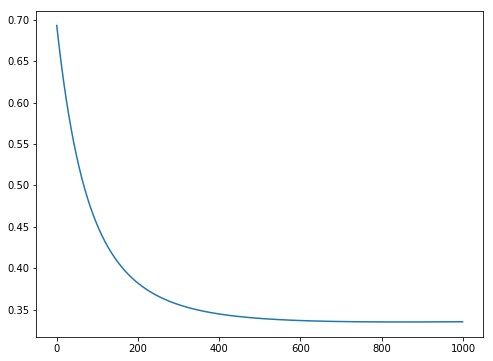

In [73]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(w, x, b):
    return sigmoid(np.matmul(x, w) + b) # (5000, 400) * (400 * 10) + b

def computeCost(w, x, b, y, m, _lambda):
    hx = hypothesis(w, x, b)  # (5000, 10)
    cost = np.dot(-1/m, np.sum(np.matmul(y.T, np.log(hx)) + np.matmul((1 - y).T, np.log(1 - hx))))
    regularizationTerm = np.dot(_lambda/(2 * m), np.sum(np.square(w)))
    cost = (cost + regularizationTerm) / 100
    return cost

def gradientDescent(w, x, b, y, m, learning_rate, _lambda):
    hx = hypothesis(w, x, b)
    w_gradient = learning_rate/m * np.matmul(x.T, (hx - y)) + (_lambda / m) * w
    b_gradient = learning_rate/m * np.sum(hx - y)
    w = w - w_gradient
    b = b - b_gradient
    return w, b

def showCostFunction(x, y):
    plt.figure(figsize=(8, 6))
    plt.plot(x, y)

def main():
    x = np.array(X) # shape (5000, 400)
    n_values = np.max(Y) + 1
    y = np.eye(n_values)[Y]
    y = y.reshape((-1, 10)) # shape (5000, 11)
    
    m = len(X)
    n = len(x[0])
    print(m,n)
    
    w = np.zeros((n, 10))
    b = np.zeros(10)
    
    learning_rate = 1e-3
    steps = 1000
    _lambda = 0
    
    plt_cost = np.empty(steps)
    plt_step = np.empty(steps)
    
    for step in range(steps):
        if step % 100 == 0:
            print("step:", step)
        plt_step[step] = step
        plt_cost[step] = computeCost(w, x, b, y, m, _lambda)
        w, b = gradientDescent(w, x, b, y, m, learning_rate, _lambda)
    print(plt_cost[0])
    print(plt_cost[steps - 1])
    
    showCostFunction(plt_step, plt_cost)
    
    a = np.argmax(hypothesis(w, x, b), axis=1).reshape((m, -1))
    is_correct = np.equal(a, Y)
    accuracy = np.sum(is_correct) / m
    print(accuracy)
    
main()

In [90]:
def main2():
    weight = sio.loadmat("./machine-learning-ex3/ex3/ex3weights.mat")

    w1 = np.array(weight["Theta1"])
    w2 = np.array(weight["Theta2"])

    print(w1.shape, w2.shape)
    
    x = np.array(X) # shape (5000, 400)
    n_values = np.max(Y) + 1
    y = np.eye(n_values)[Y]
    y = y.reshape((-1, 10)) # shape (5000, 11)
    
    m = len(X)
    n = len(x[0])
    print(m,n)

    a1 = np.c_[np.ones(m), x] # (5000, 401)
    
    z2 = np.matmul(a1, w1.T) # (5000, 25)
    a2 = np.c_[np.ones(len(z2)), sigmoid(z2)] # (5000, 26)
    
    z3 = np.matmul(a2, w2.T) # (5000, 10)
    a3 = sigmoid(z3)
    
    result = np.argmax(a3, axis=1).reshape((m, -1))
    is_correct = np.equal(result, Y)
    accuracy = np.sum(is_correct) / m
    print(accuracy)
main2()

(25, 401) (10, 26)
5000 400
0.9752
